<a href="https://colab.research.google.com/github/gumdropsteve/intro_to_machine_learning/blob/main/day_01/01_seattle_rain_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Rain in Seattle
Seattle is one of the rainiest places in the world. Even so, it is worth asking the question 'will it rain tomorrow.' Imagine you are headed to sleep at a hotel in downtown Seattle. 

The next days activities are supposed to include walking around outside most of the day. You want to know if it will rain or not (you don't really care how much rain just a simple yes or no will do), which will greatly impact what you choose to wear and carry around (like an umbrella). 


Build a heuristic model to predict if it will rain tomorrow.



## Our Data

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv')

df

,ds,prcp,tmax,tmin,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [ ]:
import numpy as np

# what % of days did it rain?
np.sum(df['rain']) / len(df)

0.4265977848225118

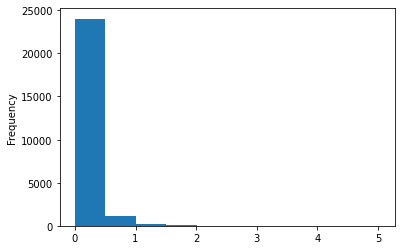

In [ ]:
# what's the % chance it rains? (not actually % chance?)
df['prcp'].plot(kind='hist');

In [ ]:
df['prcp'].value_counts()

0.00    14648
0.01      933
0.02      707
0.03      493
0.04      428
        ...  
2.49        1
2.18        1
2.20        1
2.70        1
2.95        1
Name: prcp, Length: 207, dtype: int64

Anything over 1 shouldn't be possible if `PRCP` is the % chance it rains...

What is `prcp`? Ask somebody (aka Google it)... Found answers on [Kaggle](https://www.kaggle.com/rtatman/did-it-rain-in-seattle-19482017)...


- `DATE` = the date of the observation
- `PRCP` = the amount of precipitation, in inches
- `TMAX` = the maximum temperature for that day, in degrees Fahrenheit
- `TMIN` = the minimum temperature for that day, in degrees Fahrenheit
- `RAIN` = TRUE if rain was observed on that day, FALSE if it was not

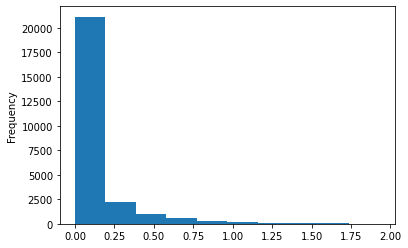

In [ ]:
df['prcp'].loc[df['prcp'] < 2].plot(kind='hist');

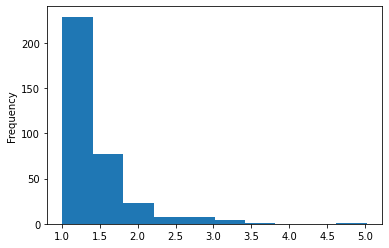

In [ ]:
# what's the distribution if we only look for > 1 inch of rain?
df['prcp'].loc[df['prcp'] > 1].plot(kind='hist');

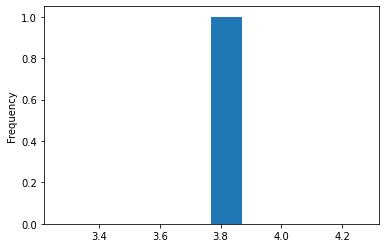

In [ ]:
# looks like not many in 3.75 - 4.75
# what's the distribution if we only look for > 1 inch of rain?
df['prcp'].loc[(df['prcp'] > 3.5) & (df['prcp'] < 5)].plot(kind='hist');

In [ ]:
df['prcp'].loc[(df['prcp'] > 3.5) & (df['prcp'] < 5)]

21886    3.77
Name: prcp, dtype: float64

In [ ]:
df['prcp'].loc[df['prcp'] > 3.5]

20381    5.02
21886    3.77
Name: prcp, dtype: float64

#### Check for Missing Values and Outliers

In [ ]:
np.sum(df.isna())

ds      0
prcp    3
tmax    0
tmin    0
rain    3
dtype: int64

In [ ]:
df.loc[df['prcp'].isna()==True]

,ds,prcp,tmax,tmin,rain
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [ ]:
df.loc[df['rain'].isna()==True]

,ds,prcp,tmax,tmin,rain
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


They're the same rows.. how much of our data is that?

In [ ]:
len(df.loc[df['rain'].isna()==True]) / len(df)

0.00011741223435481978

Let's drop... 2 consecutive days from June 1998 and 1 day from Sept 2005.

In [ ]:
df = df.loc[df['rain'].isna()==False]
df

,ds,prcp,tmax,tmin,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


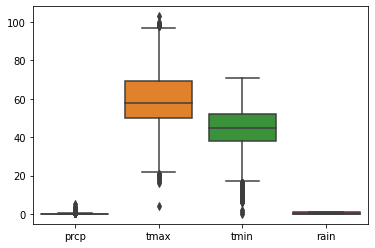

In [ ]:
import seaborn as sns

sns.boxplot(data=df)

Focus in on related values....

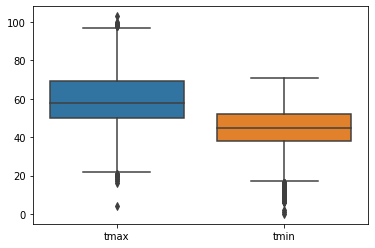

In [ ]:
sns.boxplot(data=df[['tmax', 'tmin']])

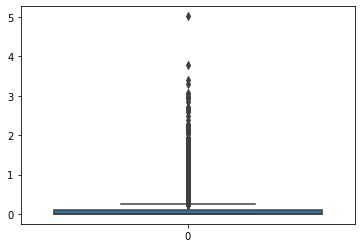

In [ ]:
sns.boxplot(data=df['prcp'])

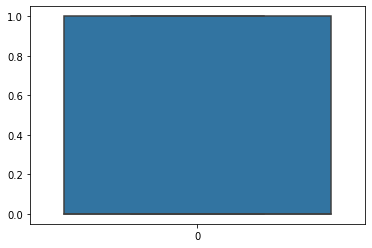

In [ ]:
sns.boxplot(data=df['rain'])

This one doesn't make sense, don't do that...

In [ ]:
# really, focus on the describable columns for boxplots
df.describe()

,prcp,tmax,tmin
count,25548.000000,25548.000000,25548.000000
mean,0.106222,59.543056,44.513387
std,0.239031,12.773265,8.893019
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


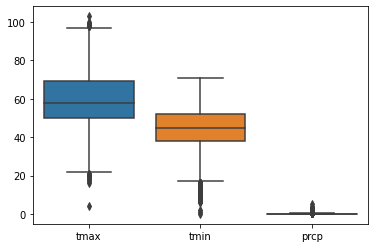

In [ ]:
sns.boxplot(data=df[['tmax', 'tmin', 'prcp']])

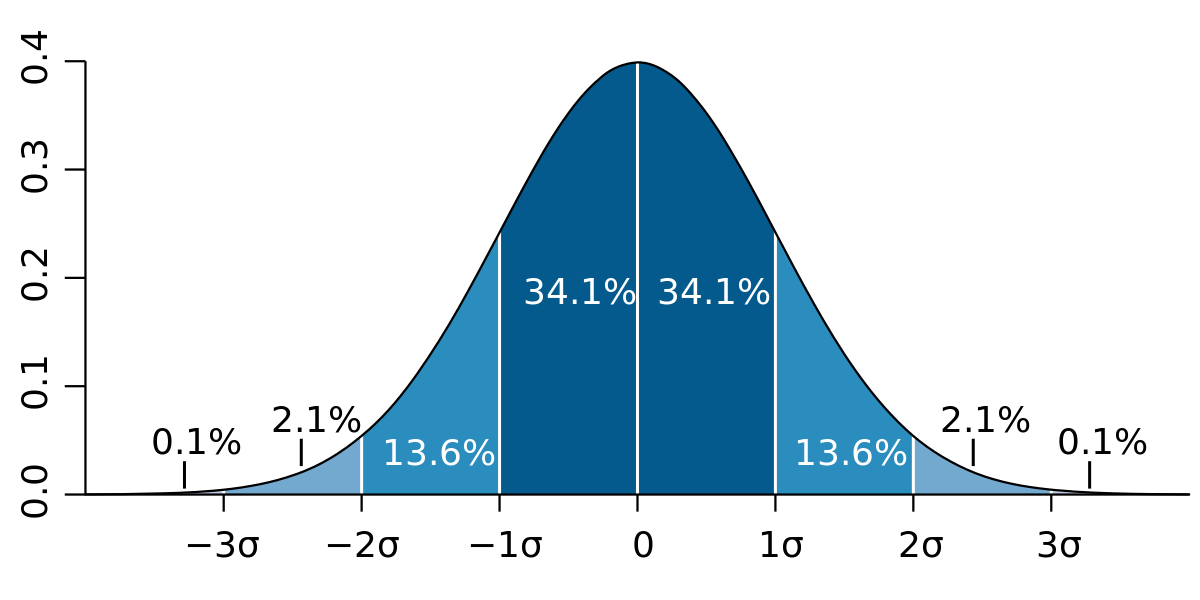
- tmax
    - 34 (~2 std below)
    - 47 (~1 std below)
    - 59 (mean)
    - 72 (~1 std above)
    - 84 (~2 std above)
- tmin
    - 27
    - 36
    - 44 (mean)
    - 53
    - 61

In [ ]:
df.tmax.value_counts()[-5:]

17     1
19     1
100    1
4      1
16     1
Name: tmax, dtype: int64

In [ ]:
np.mean(df.tmax)

59.54305620792234

In [ ]:
df['tmin'].value_counts()[-5:]

7     4
2     1
1     1
71    1
0     1
Name: tmin, dtype: int64

In [ ]:
np.mean(df['tmin'])

44.513386566463126

In [ ]:
len(df)

25548

In [ ]:
df.loc[(df.tmax<90) & (df.tmin>17)]

,ds,prcp,tmax,tmin,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [ ]:
df = df.loc[(df.tmax<90) & (df.tmin>17)]

df

,ds,prcp,tmax,tmin,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


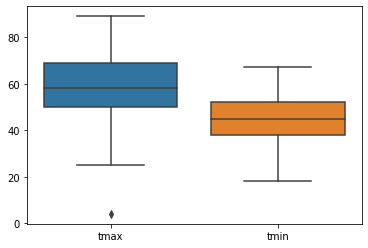

In [ ]:
sns.boxplot(data=df[['tmax', 'tmin']])

In [ ]:
print(len(df))

df = df.loc[df.tmax>20]

len(df)

25225


25224

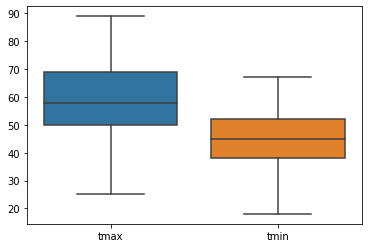

In [ ]:
sns.boxplot(data=df[['tmax', 'tmin']])

In [ ]:
# # for next time
# df = df.loc[(df.tmax<90)  & (df.tmax>20) & (df.tmin>17)]

In [ ]:
# sns.pairplot(data=df)

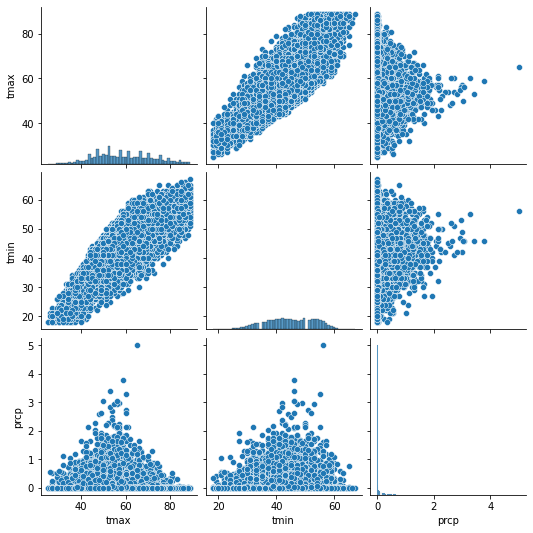

In [ ]:
sns.pairplot(df[['tmax', 'tmin', 'prcp']])

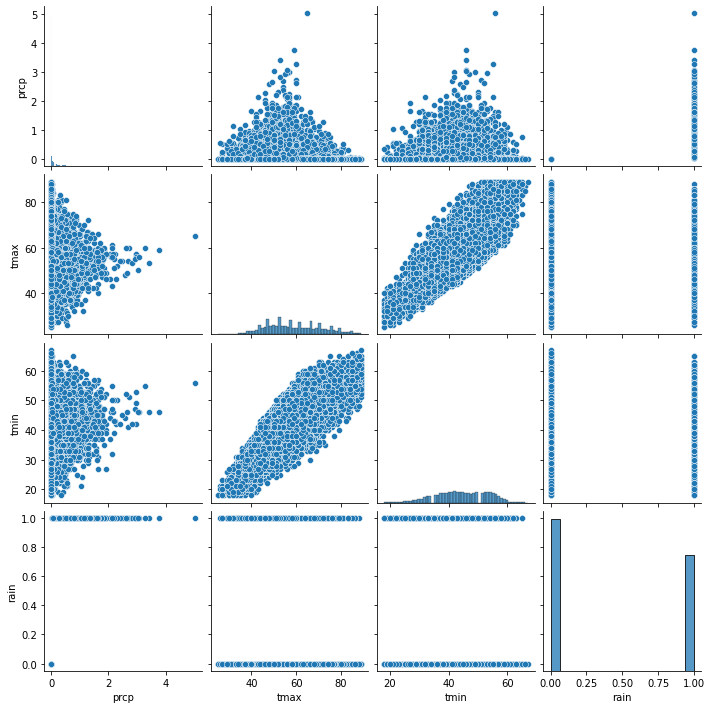

In [ ]:
df_2 = df.copy()

df_2['rain'] = df_2['rain'].astype(np.int)

sns.pairplot(df_2)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


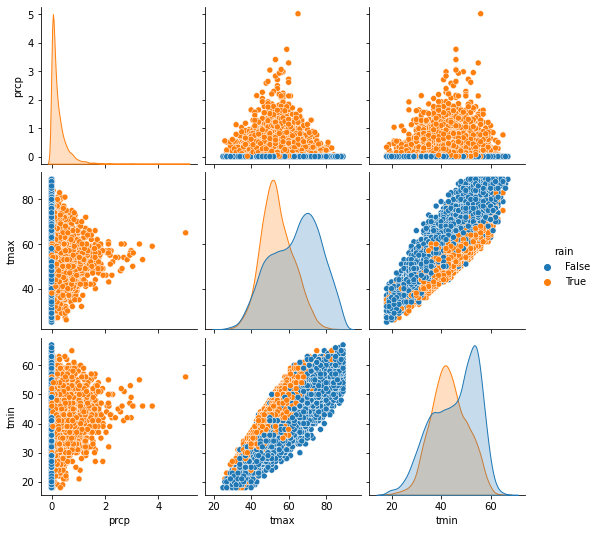

In [ ]:
# something you could tune later can be found here
sns.pairplot(df, hue='rain')

In [ ]:
# challenge
# plot prcp by day (ds on x axis)

## Set up a basic model to make predicitons

First, split the data...

In [ ]:
len(df)

25224

In [ ]:
int(25224 * 0.8)

20179

In [ ]:
# 80 / 20 train test split
train = df.head(20179)

test = df.tail(len(df) - 20179)

train

,ds,prcp,tmax,tmin,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
20429,2003-12-07,0.18,45,39,True
20430,2003-12-08,0.04,45,35,True
20431,2003-12-09,0.00,47,32,False
20432,2003-12-10,0.22,45,39,True


In [ ]:
test

,ds,prcp,tmax,tmin,rain
20434,2003-12-12,0.22,48,38,True
20435,2003-12-13,0.46,48,39,True
20436,2003-12-14,0.07,43,36,True
20437,2003-12-15,0.01,45,38,True
20438,2003-12-16,0.07,51,41,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


Get rid of columns we're not going to use, split into `X` and `y` (target).

In [ ]:
train = train.drop('ds', axis=1)
X_train = train[['prcp', 'tmax', 'tmin']]
y_train = train.rain.astype(np.int32)

test = test.drop('ds', axis=1)
X_test = test[['prcp', 'tmax', 'tmin']]
y_test = test.rain.astype(np.int32)

# what's it look like?
X_train

,prcp,tmax,tmin
0,0.47,51,42
1,0.59,45,36
2,0.42,45,35
3,0.31,45,34
4,0.17,45,32
...,...,...,...
20429,0.18,45,39
20430,0.04,45,35
20431,0.00,47,32
20432,0.22,45,39


In [ ]:
y_test

20434    1
20435    1
20436    1
20437    1
20438    1
        ..
25546    0
25547    0
25548    0
25549    0
25550    0
Name: rain, Length: 5045, dtype: int32

Bring in a model now...

In [ ]:
from sklearn.linear_model import LogisticRegression

# logistic regression is a classifier, for our case, True (1) or False (0)
lr = LogisticRegression()

lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predict the y values from X test data
lr.predict(X_test)

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
preds = lr.predict(X_test)

np.mean(y_test == preds)

0.9260654112983152

#### Another way to split your data...

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['prcp', 'tmax', 'tmin']]  # all the values you want to help predict the target value
y = df.rain.astype(np.int32)  # the target value

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
lr = LogisticRegression()

lr.fit(X=X_train, y=y_train)

preds = lr.predict(X_test)

np.mean(y_test == preds)

0.9357779980178395